In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import pandas as pd

In [6]:
data_set = pd.read_csv("/content/kag_risk_factors_cervical_cancer.csv")

In [7]:
print(data_set.head())

   Age Number of sexual partners First sexual intercourse Num of pregnancies  \
0   18                       4.0                     15.0                1.0   
1   15                       1.0                     14.0                1.0   
2   34                       1.0                        ?                1.0   
3   52                       5.0                     16.0                4.0   
4   46                       3.0                     21.0                4.0   

  Smokes Smokes (years) Smokes (packs/year) Hormonal Contraceptives  \
0    0.0            0.0                 0.0                     0.0   
1    0.0            0.0                 0.0                     0.0   
2    0.0            0.0                 0.0                     0.0   
3    1.0           37.0                37.0                     1.0   
4    0.0            0.0                 0.0                     1.0   

  Hormonal Contraceptives (years)  IUD  ... STDs: Time since first diagnosis  \
0           

In [8]:
#Extracting Independent and dependent Variable  
x= data_set.iloc[:20, 2].values  
y= data_set.iloc[:20,1].values

In [9]:
print(x)
print(y)

['15.0' '14.0' '?' '16.0' '21.0' '23.0' '17.0' '26.0' '20.0' '15.0' '26.0'
 '17.0' '14.0' '25.0' '18.0' '18.0' '21.0' '15.0' '20.0' '27.0']
['4.0' '1.0' '1.0' '5.0' '3.0' '3.0' '3.0' '1.0' '1.0' '3.0' '3.0' '1.0'
 '4.0' '2.0' '2.0' '3.0' '4.0' '3.0' '2.0' '2.0']


In [16]:
data = list(zip(x, y))
print(data)

[('15.0', '4.0'), ('14.0', '1.0'), (17.0, '1.0'), ('16.0', '5.0'), ('21.0', '3.0'), ('23.0', '3.0'), ('17.0', '3.0'), ('26.0', '1.0'), ('20.0', '1.0'), ('15.0', '3.0'), ('26.0', '3.0'), ('17.0', '1.0'), ('14.0', '4.0'), ('25.0', '2.0'), ('18.0', '2.0'), ('18.0', '3.0'), ('21.0', '4.0'), ('15.0', '3.0'), ('20.0', '2.0'), ('27.0', '2.0')]


In [17]:
data_set.isnull().any().any()
data_set = data_set.fillna(0)
data_set.replace(to_replace=np.nan,value=0)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
2,34,1.0,17.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,0.0,0.0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0.0,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0


In [18]:
all_na = data_set.columns[data_set.isna().all()]
data_set.drop(all_na, axis = 1, inplace = True)

In [19]:
for feature in data_set.columns:
    data_set[feature].replace('?',np.nan,inplace=True )
    data_set[feature].fillna(value=0,inplace=True)
for feature in data_set.columns:
    data_set[feature].replace(0,data_set[feature].median(),inplace=True)
data_set.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
2,34,1.0,17.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,0.0,0.0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0


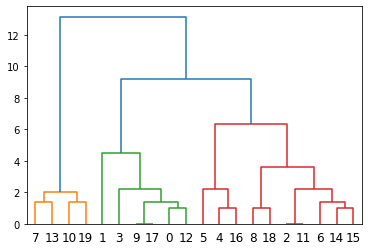

In [20]:
linkage_data = linkage(data, method='complete', metric='euclidean') #check with
#single complete #ward
dendrogram(linkage_data)
plt.show()